In [3]:
import os
# os.environ['KAGGLE_USERNAME'] = "naominoemie"
# os.environ['KAGGLE_KEY'] = "12c0543a36312ad3616435b3ca344332"

In [4]:
# !kaggle datasets download tawsifurrahman/covid19-radiography-database

In [5]:
# !unzip /content/covid19-radiography-database.zip

### Count the number of images in the COVID and Normal folders

In [8]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [9]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

### Read and display an image from the Normal folder

In [12]:
import cv2

In [13]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png')

In [14]:
import matplotlib.pyplot as plt

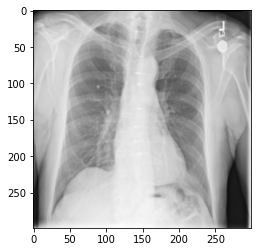

In [15]:
plt.imshow(img)

### Print the shape of the image

In [16]:
img.shape

(299, 299, 3)

In [19]:
import pandas as pd
import numpy as np

### Load the COVID metadata into a Pandas DataFrame

In [21]:
df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [22]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


### Get the list of COVID image URLs

In [23]:
urls = os.listdir('COVID-19_Radiography_Dataset/COVID/images')

### Construct the path for the first COVID image in the list

In [24]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

In [25]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

### Function to load and preprocess images

In [26]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

### Load all COVID images and their targets

In [27]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

### Print the number of COVID images loaded

In [28]:
len(covidUrl), len(covidImages)

(3616, 3616)

### Load all Normal images and their targets

In [29]:
normal_path = "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

### Print the shapes of the COVID and Normal image arrays

In [30]:

covidImages.shape

(3616, 100, 100, 3)

In [31]:

normalImages.shape

(10192, 100, 100, 3)

### Concatenate the COVID and Normal image arrays into a single array

In [32]:
data = np.r_[covidImages, normalImages]

In [33]:

data.shape

(13808, 100, 100, 3)

### Concatenate the COVID and Normal target arrays into a single array

In [34]:
targets = np.r_[covidTargets, normalTargets]

In [35]:

targets.shape

(13808,)

### Split the data into training and testing sets

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [43]:
import tensorflow as tf

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Define the CNN architecture

In [46]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Print the model summary

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 16)      

### Compile the model with Adam optimizer and binary crossentropy loss

In [48]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

### Train the model on the training set and validate on the testing set

In [49]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
324/324 [==============================] - 37s 111ms/step - loss: 0.4062 - accuracy: 0.8119 - val_loss: 0.3560 - val_accuracy: 0.8398
Epoch 2/5
324/324 [==============================] - 34s 106ms/step - loss: 0.2851 - accuracy: 0.8819 - val_loss: 0.2286 - val_accuracy: 0.9001
Epoch 3/5
324/324 [==============================] - 34s 104ms/step - loss: 0.2171 - accuracy: 0.9088 - val_loss: 0.2030 - val_accuracy: 0.9192
Epoch 4/5
324/324 [==============================] - 34s 104ms/step - loss: 0.1758 - accuracy: 0.9294 - val_loss: 0.1808 - val_accuracy: 0.9276
Epoch 5/5
324/324 [==============================] - 34s 105ms/step - loss: 0.1531 - accuracy: 0.9391 - val_loss: 0.1784 - val_accuracy: 0.9302


### Plotting the grapth to see the train and test accuracy

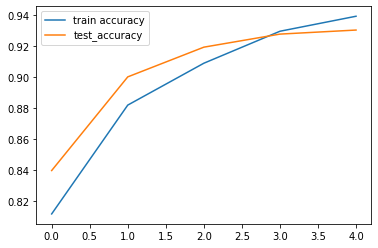

In [50]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

### Plotting the grapth to see the train and test loss

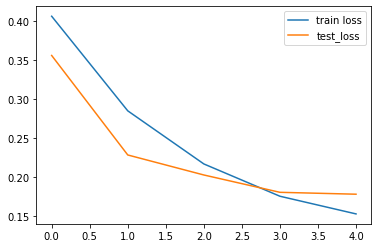

In [51]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

### Plot the training and validation loss curves

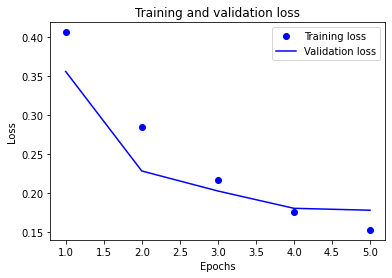

In [52]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evaluation of model to check the accuracy 

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# # Generate predictions on the testing data
# predictions = model.predict(x_test, y_test)
# y_pred = (predictions > 0.5).astype('int32')

# # Generate a classification report and confusion matrix
# print(classification_report(x_test, y_pred))
# print(confusion_matrix(y_test.labels, y_pred))

108/108 [==============================] - 3s 23ms/step - loss: 0.1784 - accuracy: 0.9302
Test accuracy: 0.9301853775978088


1/1 [==============================] - 0s 138ms/step


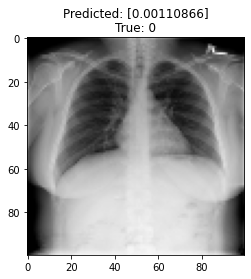

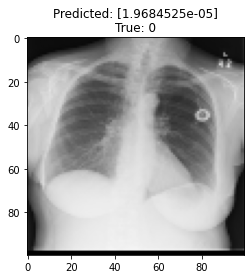

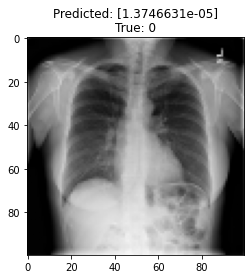

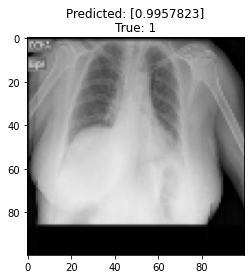

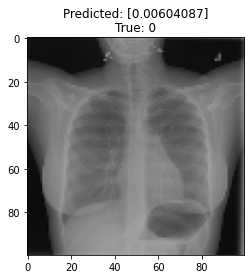

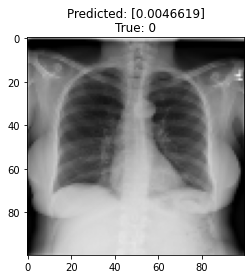

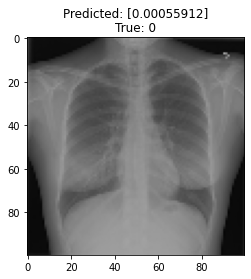

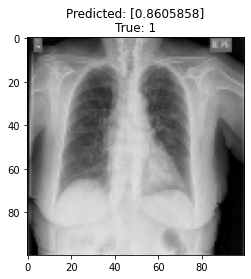

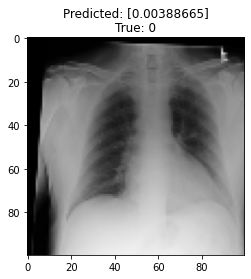

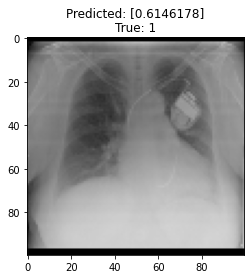

In [56]:
predictions = model.predict(x_test[:10])
for i in range(10):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {predictions[i]}\nTrue: {y_test[i]}")
    plt.show()